# Python Crash Course Part 4 Build & Optimize Models
### This is meant for internal usage, not for commercial purpose
### Timothy CL Lam 2017 DEC

Let's talk about some algorithms

## Classification / Linear Algorithms

#### Logistic Regression:
Logistic Regression
Logistic regression assumes a Gaussian distribution for the numeric input variables and can
model binary classication problems. You can construct a logistic regression model using the
LogisticRegression class1.

### Linear Discriminant Analysis or LDA
is a statistical technique for binary and multiclass
classication. It too assumes a Gaussian distribution for the numerical input variables. You can
construct an LDA model using the LinearDiscriminantAnalysis class2.

## Classication / Non-linear Algorithms

### k-Nearest Neighbors
The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to nd the k most similar
instances in the training data for a new instance and takes the mean outcome of the neighbors
as the prediction. You can construct a KNN model using the KNeighborsClassifier class3.

### Naive Bayes
Naive Bayes calculates the probability of each class and the conditional probability of each class
given each input value. These probabilities are estimated for new data and multiplied together,
assuming that they are all independent (a simple or naive assumption). When working with
real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for
input variables using the Gaussian Probability Density Function. You can construct a Naive
Bayes model using the GaussianNB class4.

### Classication and Regression Trees
Classication and Regression Trees (CART or just decision trees) construct a binary tree from
the training data. Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index).
You can construct a CART model using the DecisionTreeClassifier class5.


### Support Vector Machines
Support Vector Machines (or SVM) seek a line that best separates two classes. Those data
instances that are closest to the line that best separates the classes are called support vectors
and in
uence where the line is placed. SVM has been extended to support multiple classes.
Of particular importance is the use of dierent kernel functions via the kernel parameter. A powerful Radial Basis Function is used by default. You can construct an SVM model using the
SVC class6.

## Regression / Linear Algorithms

### Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modied to
minimize the complexity of the model measured as the sum squared value of the coecient
values (also called the L2-norm). You can construct a ridge regression model by using the Ridge
class2

### LASSO Regression
The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modication
of linear regression, like ridge regression, where the loss function is modied to minimize the
complexity of the model measured as the sum absolute value of the coecient values (also called
the L1-norm). You can construct a LASSO model by using the Lasso class3.

### ElasticNet Regression
ElasticNet is a form of regularization regression that combines the properties of both Ridge
Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coecients) by penalizing the model using both the
L2-norm (sum squared coecient values) and the L1-norm (sum absolute coecient values).
You can construct an ElasticNet model using the ElasticNet class4.

## Non-Linear Algorithms will be same as Classification e.g. SVM, Regression Tree, KNN

# Let's start coding!

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import defaultdict, Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
# The code was removed by DSX for sharing.

,CUSTOMER_ID,APPROVABLE,COLLEGE,RESIDENTIAL,MAX_NUM_OVERDUES_1_YEAR,MONTHS_SINCE_60DAY_OVER,AVG_OVERDRAFT_BALANCE,AVG_CREDIT_UTILIZATION,DEBT_INCOME_RATIO,MONTHS_CREDIT_ESTABLISH,CREDIT_QUERIES_6MONTHS,NUM_CREDIT_CARDS,LOAN_AMT,APR
0,34274.0,0.0,Bachelors,Other,0.0,0.0,1979.166812,0.485324,0.479821,106.0,11.0,5.0,448180.89050,0.089636
1,174240.0,0.0,None,Rent,0.0,13.0,1335.582937,0.227195,0.478645,79.0,5.0,3.0,314995.97575,0.062999
2,9434.0,1.0,None,Rent,0.0,0.0,1342.754895,0.631966,0.275831,80.0,2.0,4.0,254888.93225,0.050978
3,69251.0,1.0,None,Own,0.0,0.0,894.905748,0.548344,0.314404,94.0,3.0,1.0,271183.56000,0.054237
4,39518.0,1.0,Bachelors,Rent,0.0,0.0,923.309535,0.404981,0.452962,67.0,3.0,3.0,271242.51900,0.054249


In [20]:
numerical_columns = list(df1.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df1.select_dtypes(include=[object]).columns)
date_columns = list(df1.select_dtypes(include=['<M8[ns]']).columns)

In [21]:
#One Hot Encoder. Transform catogrical variable into numeric one
columns_to_drop = []

# For categorical variables with more than that many values, we only keep the most frequent ones
LIMIT_DUMMIES = 100

# Only keep the top 100 values
def select_dummy_values(train, features):
    dummy_values = {}
    for feature in features:
        values = [
            value
            for (value, _) in Counter(train[feature]).most_common(LIMIT_DUMMIES)
        ]
        dummy_values[feature] = values
    return dummy_values

DUMMY_VALUES = select_dummy_values(df1, [x for x in categorical_columns if not x in columns_to_drop])


def dummy_encode_dataframe(df1):
    for (feature, dummy_values) in DUMMY_VALUES.items():
        for dummy_value in dummy_values:
            dummy_name = u'%s_value_%s' % (feature, dummy_value.decode('utf-8'))
            df1[dummy_name] = (df1[feature] == dummy_value).astype(float)
        del df1[feature]
        print 'Dummy-encoded feature %s' % feature

dummy_encode_dataframe(df1)

Dummy-encoded feature RESIDENTIAL
Dummy-encoded feature COLLEGE


In [22]:
#Drop Customer ID
df1.drop('CUSTOMER_ID', axis=1, inplace=True)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 17 columns):
APPROVABLE                 10005 non-null float64
MAX_NUM_OVERDUES_1_YEAR    10005 non-null float64
MONTHS_SINCE_60DAY_OVER    10005 non-null float64
AVG_OVERDRAFT_BALANCE      10005 non-null float64
AVG_CREDIT_UTILIZATION     10005 non-null float64
DEBT_INCOME_RATIO          10005 non-null float64
MONTHS_CREDIT_ESTABLISH    10005 non-null float64
CREDIT_QUERIES_6MONTHS     10005 non-null float64
NUM_CREDIT_CARDS           10005 non-null float64
LOAN_AMT                   10005 non-null float64
APR                        10005 non-null float64
RESIDENTIAL_value_Own      10005 non-null float64
RESIDENTIAL_value_Rent     10005 non-null float64
RESIDENTIAL_value_Other    10005 non-null float64
COLLEGE_value_None         10005 non-null float64
COLLEGE_value_Bachelors    10005 non-null float64
COLLEGE_value_Advanced     10005 non-null float64
dtypes: float64(17)
memory usage: 1.3 MB


In [47]:
#Scale the Value for Model Building
from sklearn.preprocessing import RobustScaler
array = df1.values    
rs = RobustScaler(quantile_range=(25, 75)).fit(array)
S_array = rs.transform(array)
S_array.shape
S_array[:]
dataframe=pd.DataFrame(S_array)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.0,0.0,0.0,0.492173,-0.061694,0.196863,0.446809,1.50,1.000000,0.593728,0.593728,0.0,0.0,1.0,-1.0,1.0,0.0
1,-1.0,0.0,13.0,-0.135871,-0.585781,0.191754,-0.127660,0.00,0.333333,-0.481966,-0.481966,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.128872,0.236035,-0.689911,-0.106383,-0.75,0.666667,-0.967432,-0.967432,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-0.565907,0.066256,-0.522228,0.191489,-0.50,-0.333333,-0.835825,-0.835825,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.538189,-0.224817,0.080105,-0.382979,-0.50,0.333333,-0.835349,-0.835349,0.0,1.0,0.0,-1.0,1.0,0.0


In [29]:
y[:]

array([ 0.,  0.,  1., ...,  1.,  1.,  1.])

In [36]:
S_array.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [37]:
y [:]

array([-1., -1.,  0., ...,  0.,  0.,  0.])

In [38]:
dataframe=pd.DataFrame(S_array)
print (dataframe)

        0    1     2         3         4         5         6     7         8   \
0     -1.0  0.0   0.0  0.492173 -0.061694  0.196863  0.446809  1.50  1.000000   
1     -1.0  0.0  13.0 -0.135871 -0.585781  0.191754 -0.127660  0.00  0.333333   
2      0.0  0.0   0.0 -0.128872  0.236035 -0.689911 -0.106383 -0.75  0.666667   
3      0.0  0.0   0.0 -0.565907  0.066256 -0.522228  0.191489 -0.50 -0.333333   
4      0.0  0.0   0.0 -0.538189 -0.224817  0.080105 -0.382979 -0.50  0.333333   
5      0.0  0.0   0.0  0.118614 -0.635693  0.319069 -1.468085  1.00  0.000000   
6      0.0  0.0   0.0 -0.213953  0.560153 -0.629415 -1.085106 -0.75 -0.333333   
7      0.0  0.0   0.0 -1.098787 -0.633508 -0.270375 -0.446809  0.00  0.666667   
8      0.0  1.0   0.0 -0.025477 -0.851087 -0.805405 -0.191489  1.75  0.666667   
9      0.0  0.0   0.0 -0.209369  0.027925 -0.589277 -0.276596  2.00  0.000000   
10    -1.0  0.0   0.0 -0.311512 -0.455131 -0.727702 -1.212766 -1.25  0.666667   
11     0.0  0.0   0.0 -0.611

In [43]:
#Define independent & dependent variable
x = S_array[:,1:16]
y = S_array[:,0]

### Comparing 6 Models 
Running the example provides a list of each algorithm short name, the mean accuracy and
the standard deviation accuracy.
The example also provides a box and whisker plot showing the spread of the accuracy scores
across each cross-validation fold for each algorithm.

LR: 0.705246 (0.012724)
LDA: 0.705746 (0.012613)
KNN: 0.781607 (0.010065)
CART: 0.922441 (0.009794)
NB: 0.710943 (0.012664)
SVM: 0.830684 (0.008038)


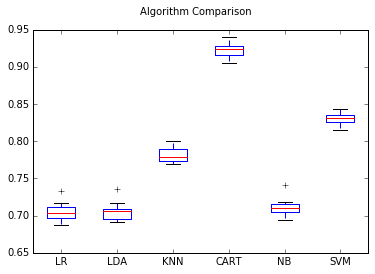

In [44]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7)
 cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Pipeline & Workflow Automation
An easy trap to fall into in applied machine learning is leaking data from your training dataset
to your test dataset. To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation. Data preparation is one easy way to leak
knowledge of the whole training dataset to the algorithm. For example, preparing your data
using normalization or standardization on the entire training dataset before learning would not
be a valid test because the training dataset would have been in
uenced by the scale of the data
in the test set.
Pipelines help you prevent data leakage in your test harness by ensuring that data preparation
like standardization is constrained to each fold of your cross-validation procedure. The example
below demonstrates this important data preparation and model evaluation work
ow on the
Pima Indians onset of diabetes dataset. The pipeline is dened with two steps:

**1. Standardize the data.**

**2. Learn a Linear Discriminant Analysis model.**

The pipeline is then evaluated using 10-fold cross-validation.

### Basic
Notice how we create a Python list of steps that are provided to the Pipeline for process
the data. Also notice how the Pipeline itself is treated like an estimator and is evaluated in its
entirety by the k-fold cross-validation procedure. Running the example provides a summary of
accuracy of the setup on the dataset.

### Pipeline
Notice how we create a Python list of steps that are provided to the Pipeline for process
the data. Also notice how the Pipeline itself is treated like an estimator and is evaluated in its
entirety by the k-fold cross-validation procedure. Running the example provides a summary of
accuracy of the setup on the dataset.

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.705745554446


### Feature Extraction and Modeling Pipeline
Feature extraction is another procedure that is susceptible to data leakage. Like data preparation,
feature extraction procedures must be restricted to the data in your training dataset. The
pipeline provides a handy tool called the FeatureUnion which allows the results of multiple
feature selection and extraction procedures to be combined into a larger dataset on which a
model can be trained. Importantly, all the feature extraction and the feature union occurs
within each fold of the cross-validation procedure. The example below demonstrates the pipeline
dened with four steps:

** 1. Feature Extraction with Principal Component Analysis (3 features). **

** 2. Feature Extraction with Statistical Selection (6 features). **

** 3. Feature Union. **

** 4. Learn a Logistic Regression Model. **


The pipeline is then evaluated using 10-fold cross-validation.

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.707244955045


# Improve Performance with Ensembles
Ensembles can give you a boost in accuracy on your dataset. In this chapter you will discover
how you can create some of the most powerful types of ensembles in Python using scikit-learn.
This lesson will step you through Boosting, Bagging and Majority Voting and show you how you
can continue to ratchet up the accuracy of the models on your own datasets. After completing
this lesson you will know:
1. How to use bagging ensemble methods such as bagged decision trees, random forest and
extra trees.
2. How to use boosting ensemble methods such as AdaBoost and stochastic gradient boosting.
3. How to use voting ensemble methods to combine the predictions from multiple algorithms.

## Combine Models Into Ensemble Predictions
The three most popular methods for combining the predictions from dierent models are:

- **Bagging**. Building multiple models (typically of the same type) from dierent subsamples of the training dataset.

- **Boosting**. Building multiple models (typically of the same type) each of which learns to
x the prediction errors of a prior model in the sequence of models.

- **Voting**. Building multiple models (typically of diering types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The nal output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:
1. Bagged Decision Trees.

Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning.
2. Random Forest.

Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiers. Specically, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split.
3. Extra Trees.

Extra Trees are another modication of bagging where random trees are constructed from
samples of the training dataset. 

In [48]:
#BaggingTree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.950326473526


In [49]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.945828871129


In [53]:
#ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.960420979021


## Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a nal
output prediction. The two most common boosting ensemble machine learning algorithms are:

$$ AdaBoost.$$
$$ Stochastic Gradient Boosting. $$

## AdaBoost
AdaBoost was perhaps the rst successful boosting ensemble algorithm. It generally works by
weighting instances in the dataset by how easy or dicult they are to classify, allowing the
algorithm to pay less attention to them in the construction of subsequent models.

In [55]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.864467232767


## Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles.

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.907346853147


# Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by rst creating two or more standalone models from your training dataset.
A Voting Classier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classiers manually or even heuristically is dicult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn. 

0.833283116883


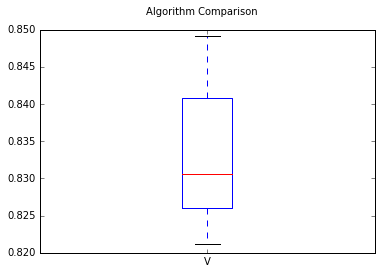

In [58]:
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels('Voting')
pyplot.show()

# Improve Performance with Algorithm Tuning
Algorithm tuning is a nal step in the process of applied machine learning before nalizing your
model. It is sometimes called hyperparameter optimization where the algorithm parameters
are referred to as hyperparameters, whereas the coecients found by the machine learning
algorithm itself are referred to as parameters. Optimization suggests the search-nature of the
problem. Phrased as a search problem, you can use dierent search strategies to nd a good and
robust parameter or set of parameters for an algorithm on a given problem. Python scikit-learn
provides two simple methods for algorithm parameter tuning:
 

**Grid Search Parameter Tuning.**

**Random Search Parameter Tuning.**

##  Grid Search Parameter Tuning
Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters specied in a grid. You can perform a grid

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
#Running the example lists out the optimal score achieved and the set of parameters in the
#grid that achieved that score. In this case the alpha value of 1.0.

0.0675642367707
1.0


## Random Search Parameter Tuning
Random search is an approach to parameter tuning that will sample algorithm parameters from
a random distribution (i.e. uniform) for a xed number of iterations. A model is constructed
and evaluated for each combination of parameters chosen. The example below evaluates
dierent random alpha values between 0 and 1 for the Ridge Regression algorithm on the
standard diabetes dataset. A total of 100 iterations are performed with uniformly random alpha
values selected in the range between 0 and 1 (the range that alpha values can take).

In [65]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(x, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)
#Running the example produces results much like those in the grid search example above. An
#optimal alpha value near 1.0 is discovered.

0.0675642005572
0.977989511997


# Final Step: Save & Load Models
Finding an accurate machine learning model is not the end of the project. In this chapter you
will discover how to save and load your machine learning model in Python using scikit-learn.
This allows you to save your model to le and load it later in order to make predictions. After
completing this lesson you will know:
1. The importance of serializing models for reuse.
2. How to use pickle to serialize and deserialize machine learning models.
3. How to use Joblib to serialize and deserialize machine learning models.

## Pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a le. Later you
can load this le to deserialize your model and use it to make new predictions.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)
#Running the example saves the model to finalized model.sav in your local working
#directory. Load the saved model and evaluating it provides an estimate of accuracy of the model
#on unseen data.

0.711689884918


## Finalize Your Model with Joblib
The Joblib2 library is part of the SciPy ecosystem and provides utilities for pipelining Python
jobs. It provides utilities for saving and loading Python objects that make use of NumPy data
structures, eciently3. This can be useful for some machine learning algorithms that require a
lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors).

In [72]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)
#Running the example saves the model to finalized model.sav in your local working
#directory. Load the saved model and evaluating it provides an estimate of accuracy of the model
#on unseen data.

0.711689884918


## Tips for Finalizing Your Model
This section lists some important considerations when nalizing your machine learning models.

** - Python Version. **

Take note of the Python version. You almost certainly require the
same major (and maybe minor) version of Python used to serialize the model when you
later load it and deserialize it.

** - Library Versions. **

The version of all major libraries used in your machine learning
project almost certainly need to be the same when deserializing a saved model. This is
not limited to the version of NumPy and the version of scikit-learn.

** - Manual Serialization. **

You might like to manually output the parameters of your
learned model so that you can use them directly in scikit-learn or another platform in
the future. Often the techniques used internally by machine learning algorithms to make
predictions are a lot simpler than those used to learn the parameters and can be easy to
implement in custom code that you have control over.

Take note of the version so that you can re-create the environment if for some reason you
cannot reload your model on another machine or another platform at a later time.